In [277]:
# Importing modules and packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd


In [278]:
import os 
# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/lifeexp.xlsx')
assert os.path.isfile('data/alconsp.xlsx')

# Print everything in data
os.listdir('data/')

['alconsp.xlsx', 'lifeexp.xlsx']

In [279]:
# Reading in Excelfile from our world in data
lifeexp = pd.read_excel('data/lifeexp.xlsx')
(lifeexp).head()


,Entity,Code,Year,Life expectancy - Sex: female - Age: at birth - Variant: estimates,Life expectancy - Sex: male - Age: at birth - Variant: estimates,Population,Continent
0,Afghanistan,AFG,2016,65.1,61.2,3.463621e+07,NaN
1,Africa (UN),NaN,2016,63.4,59.8,1.232112e+09,NaN
2,Albania,ALB,2016,81.4,76.6,2.881064e+06,NaN
3,Algeria,DZA,2016,76.8,74.7,4.033933e+07,NaN
4,American Samoa,ASM,2016,75.0,70.0,5.046800e+04,NaN


In [280]:
print(lifeexp.columns)

Index(['Entity', 'Code', 'Year',
       'Life expectancy - Sex: female - Age: at birth - Variant: estimates',
       'Life expectancy - Sex: male - Age: at birth - Variant: estimates',
       'Population ', 'Continent'],
      dtype='object')


In [281]:
#dropping columns
lifeexp.drop(['Continent', 'Code'], axis=1, inplace=True) 

# renaming the columns using columns dictionary
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['ratio'] = 'FM_ratio'
columns_dict['Population (historical estimates)'] = 'Population'
columns_dict['Life expectancy - Sex: female - Age: at birth - Variant: estimates']= 'Female_le'
columns_dict['Life expectancy - Sex: male - Age: at birth - Variant: estimates'] = 'Male_le'
lifeexp.rename(columns=columns_dict,inplace=True)

# dropping the NaN values
lifeexp = lifeexp.dropna(subset=['Female_le', 'Male_le'])

#calculating female male life expectancy ratio
lifeexp['FM_le_ratio'] = lifeexp['Female_le']/lifeexp['Male_le']

lifeexp.head(20)

,Country,Year,Female_le,Male_le,Population,FM_le_ratio
0,Afghanistan,2016,65.1,61.2,3.463621e+07,1.063725
1,Africa (UN),2016,63.4,59.8,1.232112e+09,1.060201
2,Albania,2016,81.4,76.6,2.881064e+06,1.062663
3,Algeria,2016,76.8,74.7,4.033933e+07,1.028112
4,American Samoa,2016,75.0,70.0,5.046800e+04,1.071429
5,Andorra,2016,85.4,80.7,7.256300e+04,1.058240
6,Angola,2016,63.4,58.7,2.915474e+07,1.080068
7,Anguilla,2016,80.7,73.5,1.484200e+04,1.097959
8,Antigua and Barbuda,2016,80.6,75.4,9.057500e+04,1.068966
9,Argentina,2016,79.7,72.9,4.366824e+07,1.093278


In [282]:
lifeexp.describe()

,Year,Female_le,Male_le,Population,FM_le_ratio
count,255.0,255.000000,255.000000,2.540000e+02,255.000000
mean,2016.0,75.470588,70.242353,1.935601e+08,1.074934
std,0.0,7.812545,7.424651,8.551585e+08,0.028017
min,2016.0,52.200000,49.600000,1.447000e+03,1.007722
25%,2016.0,70.150000,65.150000,5.186955e+05,1.055785
50%,2016.0,77.800000,71.100000,6.262626e+06,1.072109
75%,2016.0,81.400000,76.200000,2.948423e+07,1.088951
max,2016.0,88.200000,83.500000,7.513474e+09,1.159226


The Year column has a constant value of 2016. The Female_le and Male_le columns have mean life expectancies of 75.47 and 70.24 years, respectively. The Population column has a mean of 193.56 million, but a very large standard deviation of 855.16 million, indicating that there is a wide range of population sizes in the data. Lastly, the FM_le_ratio column has a mean of 1.07, indicating that, on average, female life expectancy is about 7% higher than male life expectancy.

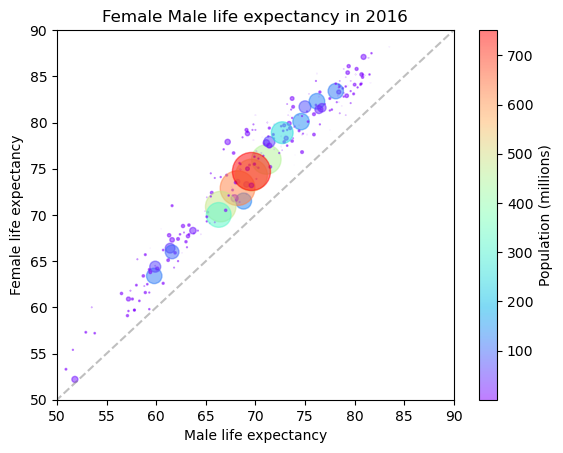

<Figure size 1500x1300 with 0 Axes>

In [283]:
#extracting population data from the dataset
pop = lifeexp['Population ']  

# Storing pop as a numpy array: np_pop
np.array(pop)
# Format population numbers to display in millions
np_pop1 = np.array(pop) / 10000000
pop_labels = [f'{pop:.2f} million' for pop in np_pop1]

#Create scatter plot
plt.scatter(lifeexp['Male_le'], lifeexp['Female_le'], s= np_pop1,  alpha=0.5, c= np_pop1, cmap = 'rainbow')

# set the x and y-axis limits
plt.xlim(50, 90)
plt.ylim(50, 90)
# Add axis labels
plt.xlabel('Male life expectancy')
plt.ylabel('Female life expectancy')
# Add colorbar legend
plt.colorbar(label='Population (millions)')

# Add title
plt.title('Female Male life expectancy in 2016')

# Add 45 degree line
plt.plot([0, 100], [0, 100], linestyle='--', color='grey', alpha =0.5)

# Add country labelsfor i, row in lifeexp.iterrows():    plt.annotate(row['Entity'], xy=(row['Male_le'], row['Female_le']), xytext=(5, 5), textcoords='offset points', fontsize=8)# After customizing, display the plot
plt.figure(figsize=(15, 13))
plt.show()



In [284]:
# Reading in second excelfile from Our world in data
alconsp = pd.read_excel('data/alconsp.xlsx')
alconsp.head(5)

,Entity,Code,Year,"Indicator:Alcohol, consumers past 12 months (%) - Sex:Male","Indicator:Alcohol, consumers past 12 months (%) - Sex:Female",Population (historical estimates),Continent
0,Afghanistan,AFG,2016,1.0,0.3,34636212,NaN
1,Africa,NaN,2016,NaN,NaN,1232111820,NaN
2,Africa (UN),NaN,2016,NaN,NaN,1232111616,NaN
3,Albania,ALB,2016,65.0,37.6,2881064,NaN
4,Algeria,DZA,2016,4.8,1.5,40339328,NaN


In [285]:
print(alconsp.columns)

Index(['Entity', 'Code', 'Year',
       'Indicator:Alcohol, consumers past 12 months (%) - Sex:Male',
       'Indicator:Alcohol, consumers past 12 months (%) - Sex:Female',
       'Population (historical estimates)', 'Continent'],
      dtype='object')


In [286]:
# Creating and renaming columns in dataset in a dictionary
columns_dict={}
columns_dict['Entity'] = 'Country'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Male'] = 'Male_alc'
columns_dict['Indicator:Alcohol, consumers past 12 months (%) - Sex:Female']= 'Female_alc'
columns_dict['Population (historical estimates)'] = 'Population'
alconsp.rename(columns=columns_dict,inplace=True)

#dropping columns continent and code
alconsp.drop(['Continent','Code'],axis=1,inplace=True)

# dropping the NaN values
alconsp = alconsp.dropna(subset=['Female_alc', 'Male_alc'])

#calculating female male alcohol consumption ratio
alconsp['FM_alc_ratio'] = alconsp['Female_alc']/alconsp['Male_alc']

alconsp.head(20)

,Country,Year,Male_alc,Female_alc,Population,FM_alc_ratio
0,Afghanistan,2016,1.0,0.3,34636212,0.300000
3,Albania,2016,65.0,37.6,2881064,0.578462
4,Algeria,2016,4.8,1.5,40339328,0.312500
6,Andorra,2016,85.2,64.3,72563,0.754695
7,Angola,2016,61.6,34.3,29154742,0.556818
9,Antigua and Barbuda,2016,63.9,36.5,90575,0.571205
10,Argentina,2016,79.9,55.7,43668236,0.697121
11,Armenia,2016,38.0,16.2,2865841,0.426316
15,Australia,2016,88.3,70.6,24195706,0.799547
16,Austria,2016,87.7,68.9,8736491,0.785633


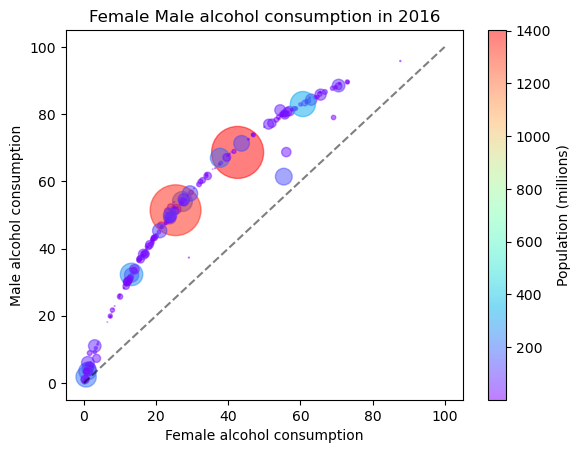

<Figure size 1000x800 with 0 Axes>

In [287]:
#extracting population data from the dataset
Pop = alconsp.Population

# Storing pop as a numpy array: np_pop
np.array(Pop)
# Format population numbers to display in millions
np_pop = np.array(Pop) / 1000000
pop_labels = [f'{Pop:.2f} million' for Pop in np_pop]
#Create scatter plot
plt.scatter(alconsp['Female_alc'], alconsp['Male_alc'], s= np_pop,  alpha=0.5, c= np_pop, cmap = 'rainbow')

# Add axis labels
plt.xlabel('Female alcohol consumption')
plt.ylabel('Male alcohol consumption')
# Add colorbar legend
plt.colorbar(label='Population (millions)')

# Add title
plt.title('Female Male alcohol consumption in 2016')

# Add 45 degree line
plt.plot([0, 100], [0, 100], linestyle='--', color='black', alpha =0.5)

# After customizing, display the plot
plt.figure(figsize=(10, 8))
plt.show()


In [288]:
alconsp.describe()

,Year,Male_alc,Female_alc,Population,FM_alc_ratio
count,188.0,188.000000,188.000000,1.880000e+02,188.000000
mean,2016.0,49.442021,29.347872,3.936001e+07,0.518978
std,0.0,25.739223,21.317873,1.458784e+08,0.155423
min,2016.0,0.200000,0.100000,1.883000e+03,0.179775
25%,2016.0,31.400000,12.800000,2.105150e+06,0.411207
50%,2016.0,49.250000,23.850000,8.730908e+06,0.483150
75%,2016.0,69.500000,45.900000,2.818458e+07,0.634180
max,2016.0,95.800000,87.700000,1.401890e+09,0.915449


In [289]:
alconsp.drop(['Male_alc','Female_alc','Population'],axis=1, inplace= True)
lifeexp.drop(['Male_le','Female_le', 'Population '], axis= 1, inplace = True)


In [291]:
combined_df = pd.merge(lifeexp,alconsp, on= 'Country', how = 'inner')
combined_df.head(20)

,Country,Year_x,FM_le_ratio,Year_y,FM_alc_ratio
0,Afghanistan,2016,1.063725,2016,0.300000
1,Albania,2016,1.062663,2016,0.578462
2,Algeria,2016,1.028112,2016,0.312500
3,Andorra,2016,1.058240,2016,0.754695
4,Angola,2016,1.080068,2016,0.556818
5,Antigua and Barbuda,2016,1.068966,2016,0.571205
6,Argentina,2016,1.093278,2016,0.697121
7,Armenia,2016,1.136298,2016,0.426316
8,Australia,2016,1.050743,2016,0.799547
9,Austria,2016,1.060683,2016,0.785633


In [292]:
combined_df.drop( 'Year_y', axis=1, inplace=True)
combined_df = combined_df.rename(columns= {'Year_x': 'Year'})
combined_df = combined_df.dropna()

In [293]:
combined_df.head(10)

,Country,Year,FM_le_ratio,FM_alc_ratio
0,Afghanistan,2016,1.063725,0.300000
1,Albania,2016,1.062663,0.578462
2,Algeria,2016,1.028112,0.312500
3,Andorra,2016,1.058240,0.754695
4,Angola,2016,1.080068,0.556818
5,Antigua and Barbuda,2016,1.068966,0.571205
6,Argentina,2016,1.093278,0.697121
7,Armenia,2016,1.136298,0.426316
8,Australia,2016,1.050743,0.799547
9,Austria,2016,1.060683,0.785633
